<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/gab-es21%2Fissue34/yolov8/02_yolo_v8_validate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Validate


## Imports and GPU Check

Check access to GPU.

In [9]:
!pip install nvidia-cuda-runtime-cu12
!pip install cuda-python

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

!pip install roboflow
!pip install ultralytics==8.0.196

!pip install python-dotenv
!pip install pickleshare

!nvidia-smi

Looking in links: https://download.pytorch.org/whl/torch_stable.html
   ---------------------------------------- 0.0/644.5 kB ? eta -:--:--
   --- ------------------------------------ 61.4/644.5 kB 1.7 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/644.5 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 644.5/644.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.212
    Uninstalling ultralytics-8.0.212:
      Successfully uninstalled ultralytics-8.0.212
Sat Nov 18 15:22:15 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |        

Imports

In [10]:
import os
import dotenv
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local


## Get Environment Variables from drive


Load the .env file

In [11]:
dotenv.load_dotenv('../yolov8_tile_local/yolov8.env')

ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [12]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.200  Python-3.11.6 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 367.8/1862.2 GB disk)


## Model

In [16]:
%cd {HOME}/datasets

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_tile_local\datasets


In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.196`


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Load Model and Weights

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for 25 epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [ ]:
print(HOME)

/content


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.7MB/s]



In [ ]:
print(dataset.location)
print(HOME)

/content/datasets/sea-turtles-1
/content


In [ ]:
DRIVE_YOLOV8='/drive/MyDrive/Colab_Notebooks/env/yolov8/runs'

In [ ]:
!ls {HOME}{DRIVE_YOLOV8}/detect/train/

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1698004023.feae51e8c0a1.26603.0  train_batch1.jpg	    val_batch1_pred.jpg
F1_curve.png					     train_batch2440.jpg    val_batch2_labels.jpg
P_curve.png					     train_batch2441.jpg    val_batch2_pred.jpg
PR_curve.png					     train_batch2442.jpg    weights
R_curve.png					     train_batch2.jpg
results.csv					     val_batch0_labels.jpg


/content


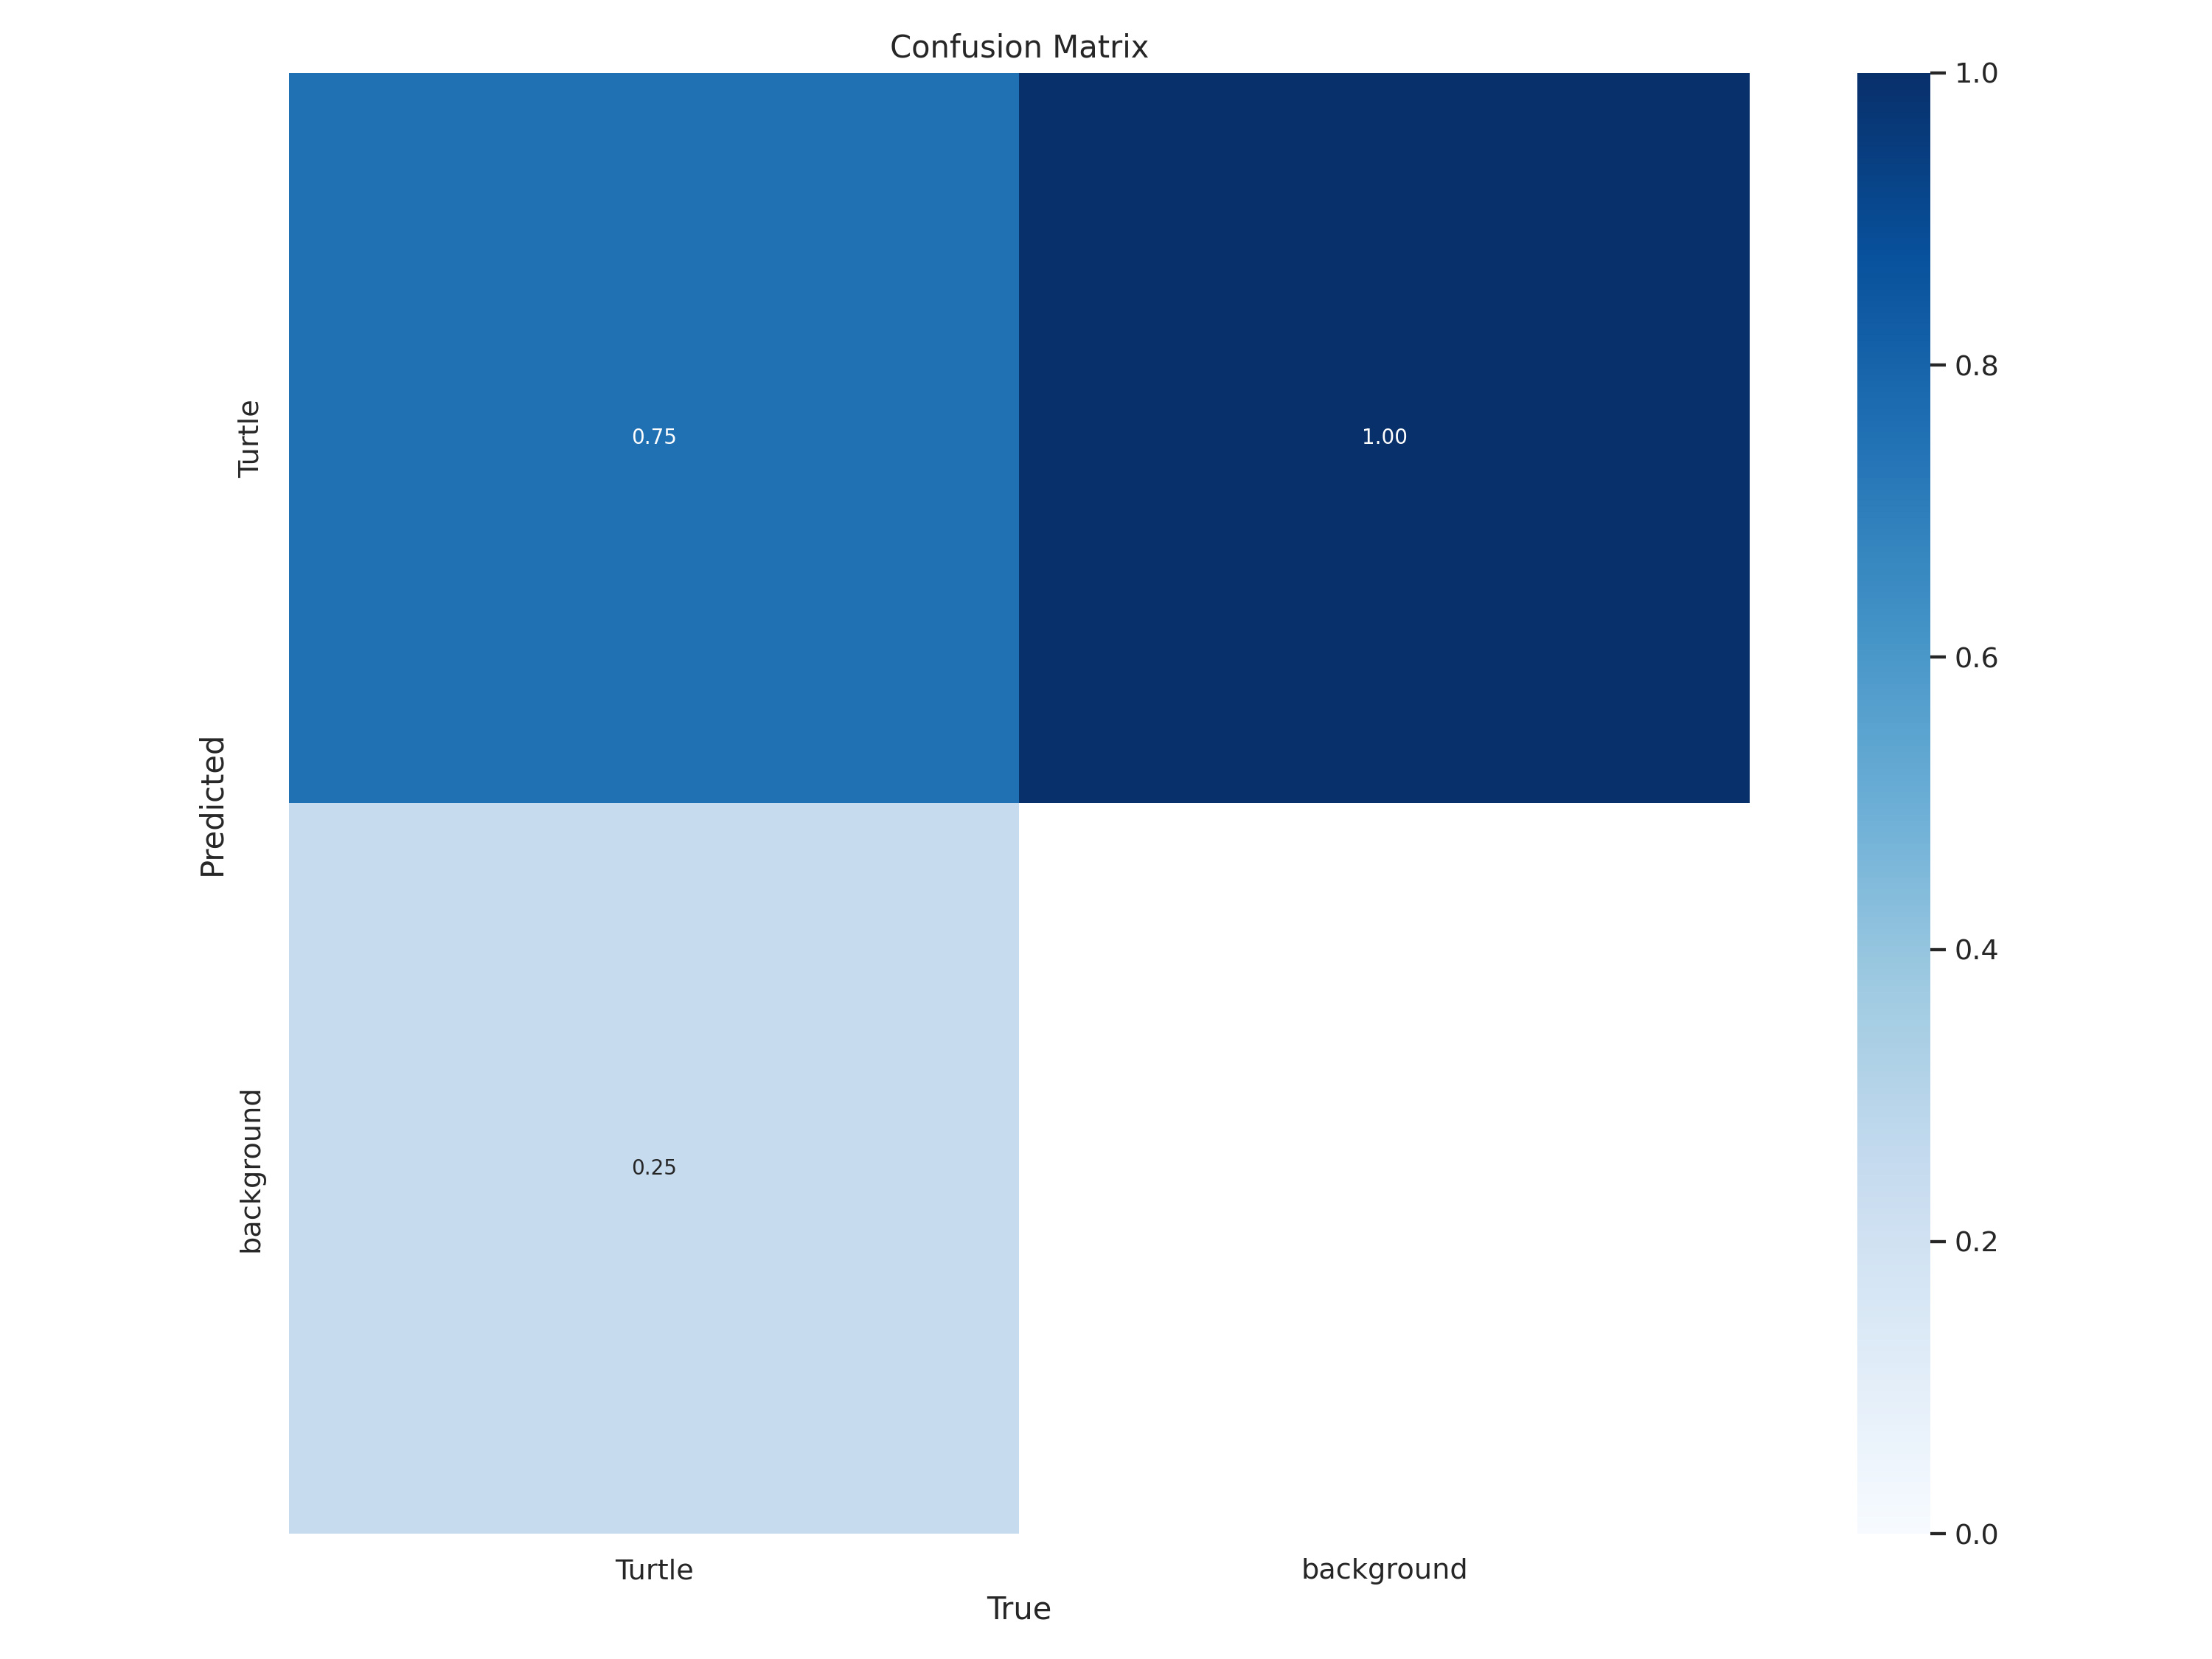

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/confusion_matrix.png', width=600)
#Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


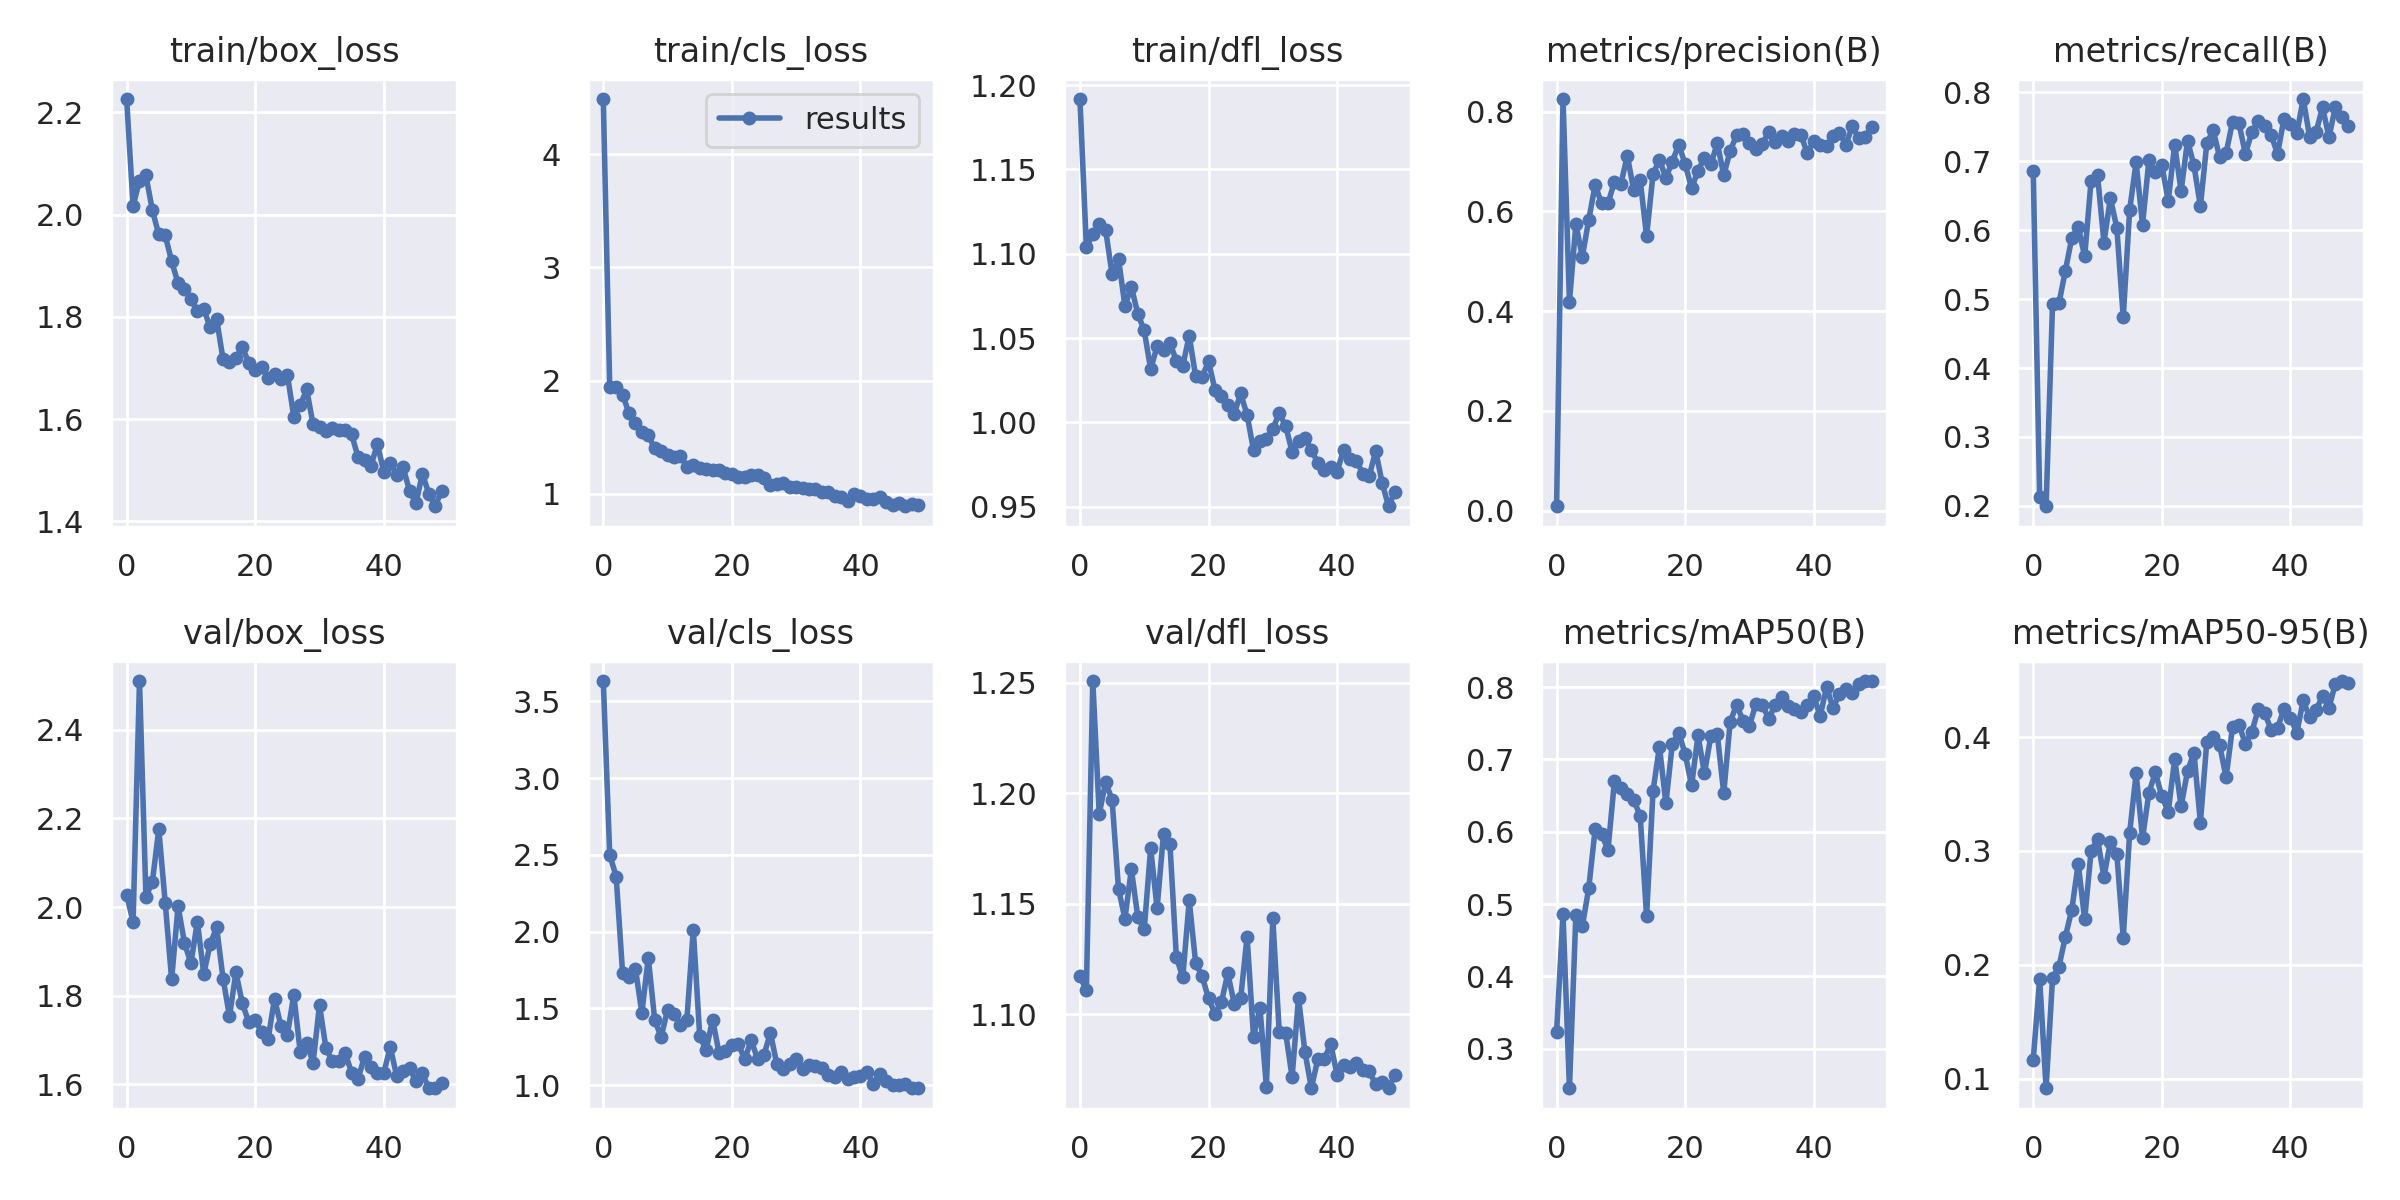

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/results.png', width=600)

/content


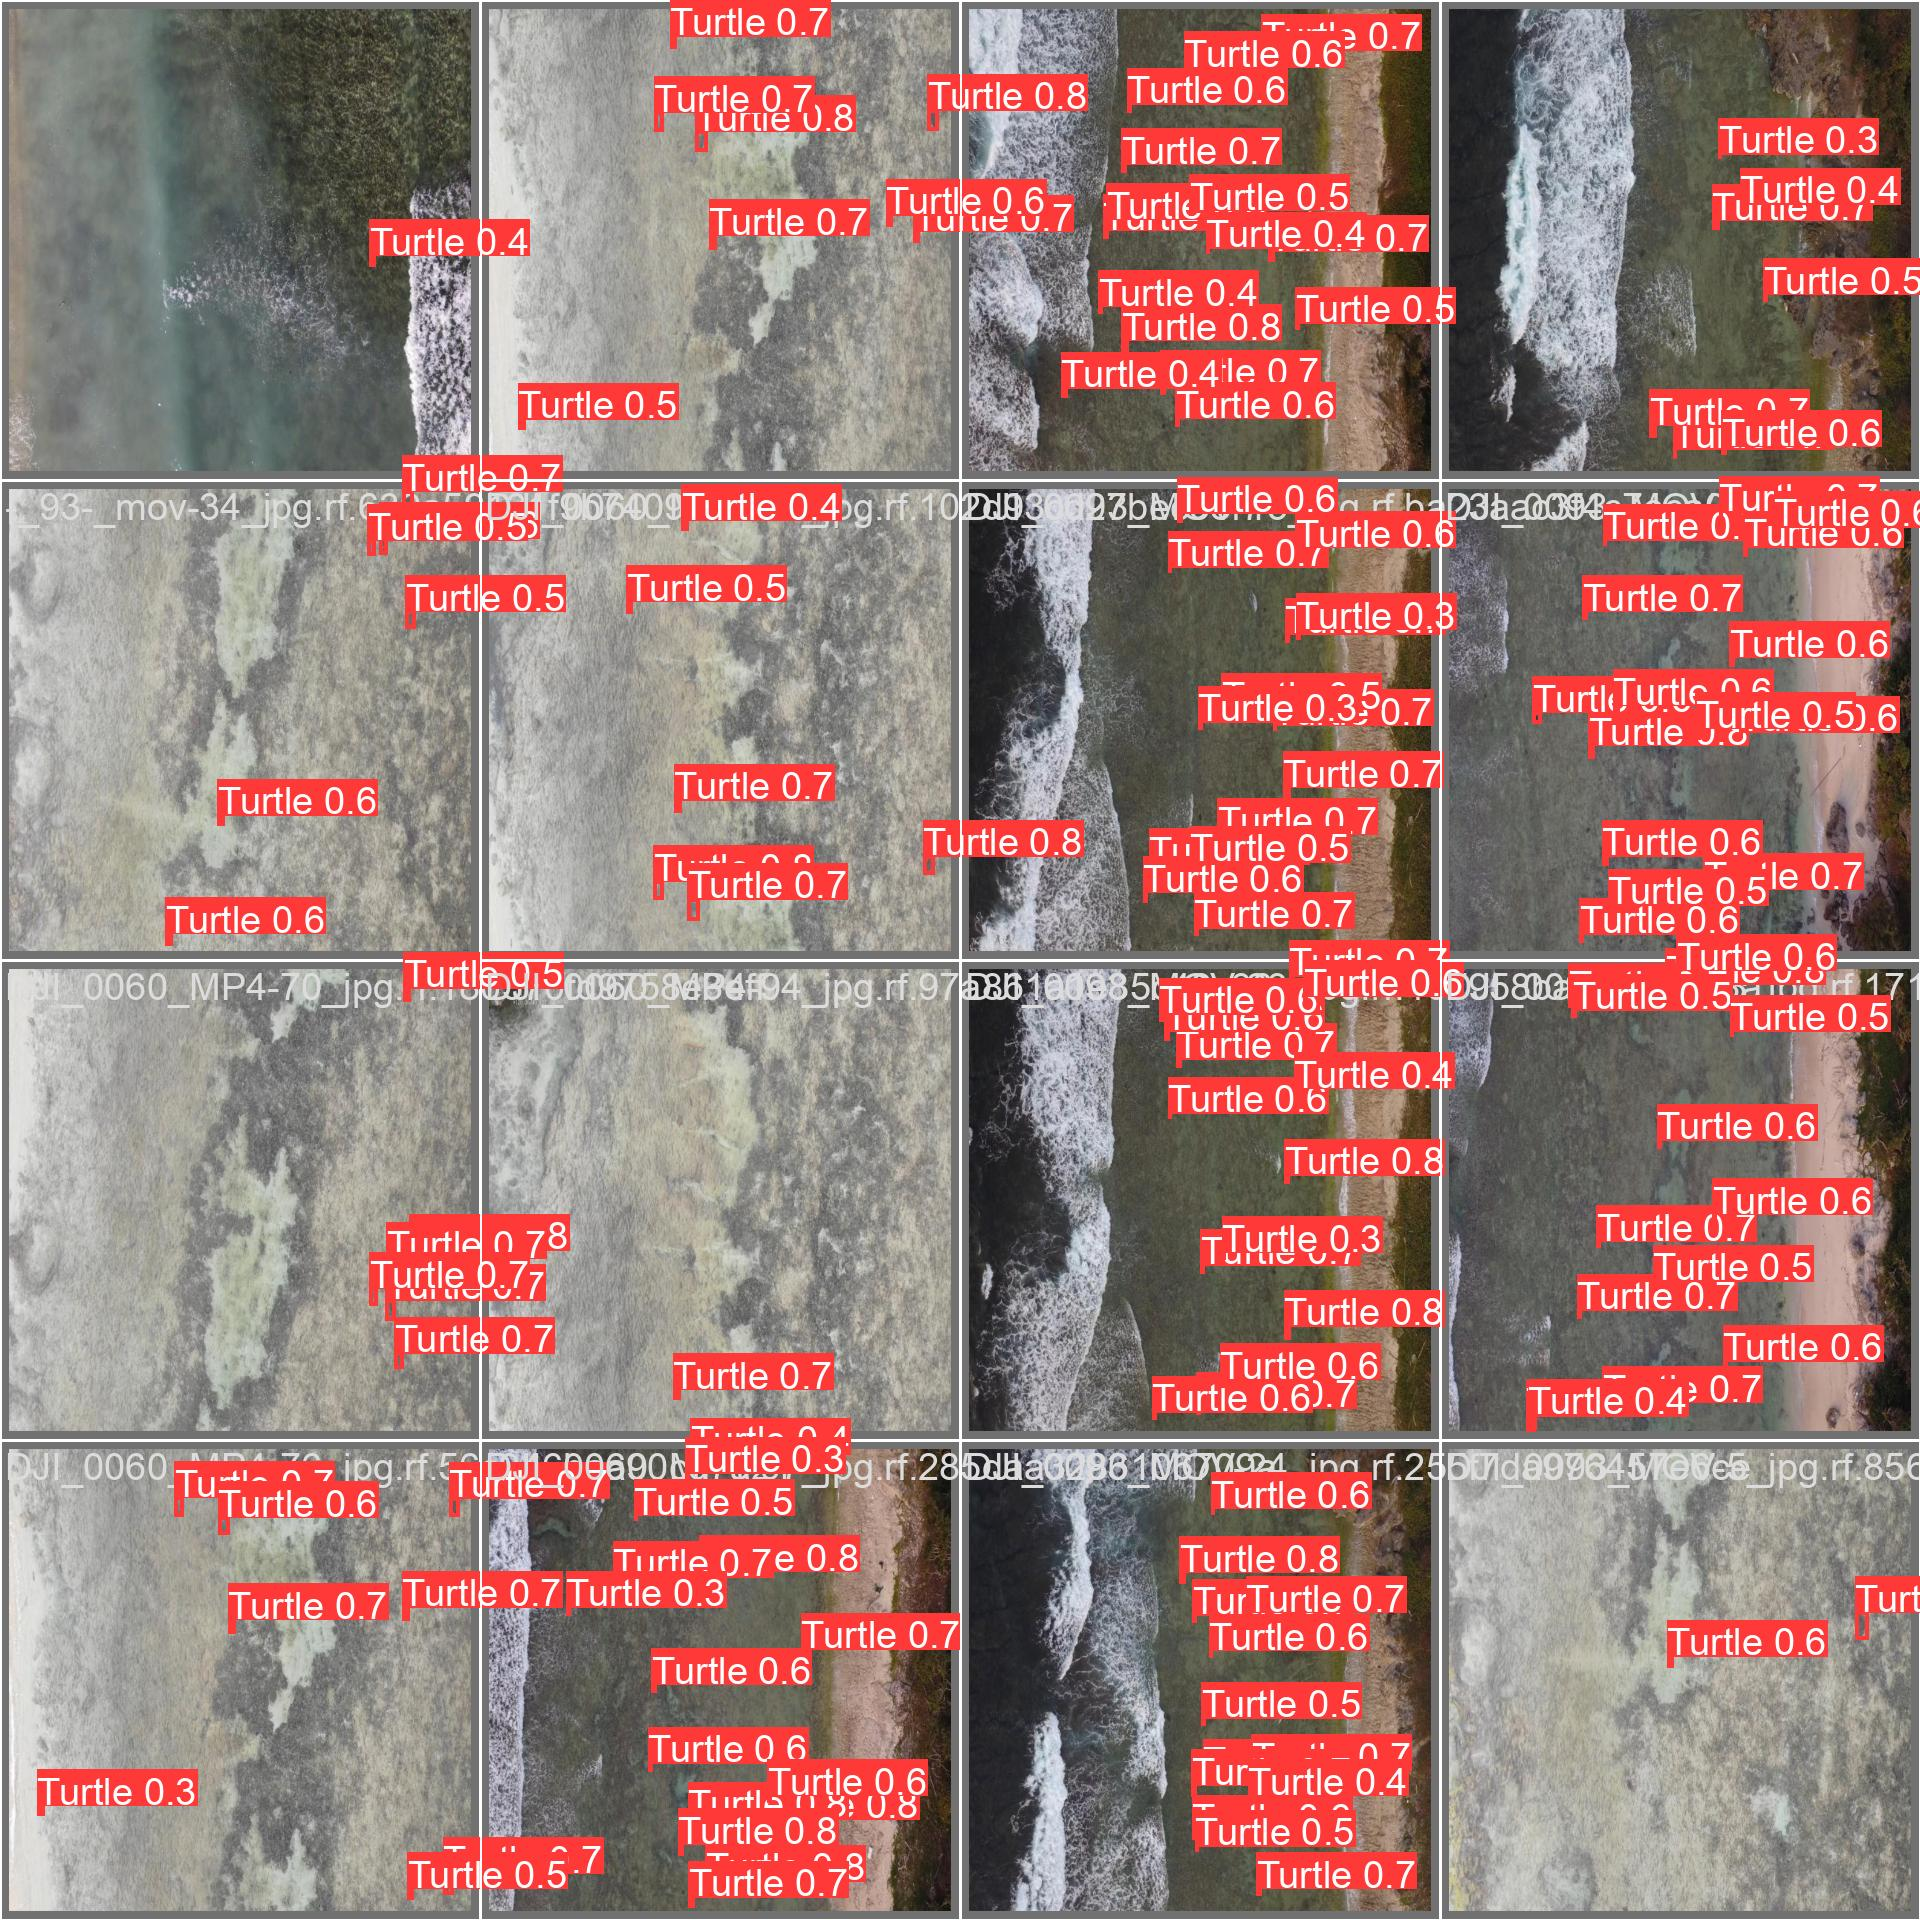

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}{DRIVE_YOLOV8}/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}{DRIVE_YOLOV8}/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-22 20:44:05.220948: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 20:44:06.303220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/sea-turtles-1/valid/labels.cache... 272 images, 42 backgrounds, 0 corrupt: 100% 272/272 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 822. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segm